In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
import astropy.units as unit
import astropy.constants as const
import itertools
import plotly.express as px 
import pandas as pd
from scipy.stats import linregress

from axion_functions import *

In [6]:
bg = np.loadtxt("..\\cosmo_bg.txt")

days = bg[0,:]
bg_rates = bg[1,:]
bg_base = 5.2e-1

bg_total = bg_base + bg_rates

cpd_to_count = 365.25*3*50
cpd_to_ckg = 50*5
N_bg = bg_total*cpd_to_count*5

def make_timely_counts():
    """Ends up in counts per kev"""
    output = []
    for index in range(1,len(days)):
        val = np.trapz(bg_total[:index], days[:index])*50
        output.append(val)
    return np.array(output)

bg_total[-1]

0.5825

In [63]:
N_bg_time = make_timely_counts()*6.2
n_req = 1.96*np.sqrt(N_bg_time)/0.9501766582302785 #Divide by fraction within energy range
n_10 = 1.98*np.sqrt(bg_10)

N_bg_time

array([     0.   ,  12024.9  ,  20171.7  ,  27332.7  ,  34126.35 ,
        40706.1  ,  47764.8  ,  53427.105,  59616.255,  65712.405,
        71734.155,  77690.805,  83591.655,  89446.005,  95258.505,
       101035.2  , 106780.74 , 112500.24 , 118196.49 , 123872.28 ,
       129530.4  , 135172.71 , 140800.605, 146415.48 , 152018.73 ,
       157611.285, 163194.075, 168768.03 , 174333.615, 179891.295,
       185442.   , 190986.195, 196523.88 , 202055.52 , 207581.115,
       213101.13 , 218616.03 , 224125.35 , 229629.555, 235129.11 ,
       240624.015, 246114.27 , 251599.875, 257081.295, 262558.53 ,
       268031.58 , 273500.91 , 278966.055, 284427.015, 289884.255,
       295337.775, 300787.575, 306233.655, 311676.015, 317115.12 ,
       322550.97 , 327983.1  , 333411.975, 338837.595, 344259.96 ])

In [64]:
days

array([   0.,   30.,   60.,   90.,  120.,  150.,  183.,  210.,  240.,
        270.,  300.,  330.,  360.,  390.,  420.,  450.,  480.,  510.,
        540.,  570.,  600.,  630.,  660.,  690.,  720.,  750.,  780.,
        810.,  840.,  870.,  900.,  930.,  960.,  990., 1020., 1050.,
       1080., 1110., 1140., 1170., 1200., 1230., 1260., 1290., 1320.,
       1350., 1380., 1410., 1440., 1470., 1500., 1530., 1560., 1590.,
       1620., 1650., 1680., 1710., 1740., 1770., 1800.])

In [65]:
days_6m = days[6:] - days[6]
N_bg_6m = N_bg_time[5:] - N_bg_time[5]

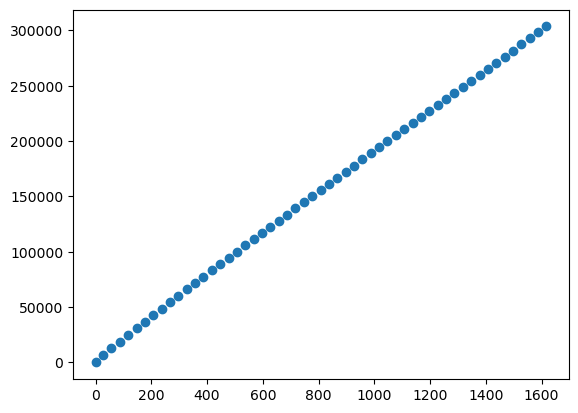

In [66]:
plt.scatter(days_6m, N_bg_6m)
#Shift by 6 months 

In [67]:
(m, c, r,s_m, s_c) = linregress(days_6m, N_bg_6m)

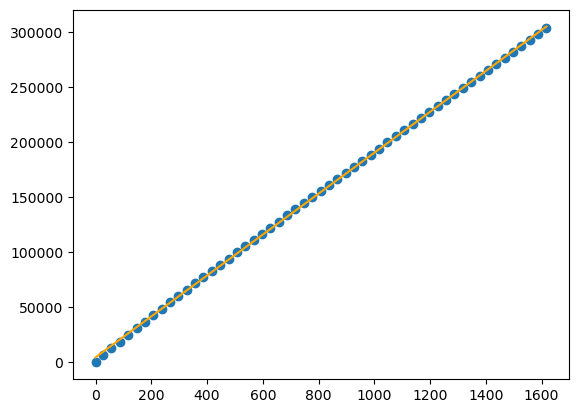

In [68]:
fig,ax = plt.subplots()
ax.scatter(days_6m, N_bg_6m)
ax.plot(days_6m, m*days_6m+c, color="orange")

In [83]:
m/50/6.2

0.5997584158467295

In [69]:
def nbg_time(t):
    '''Time in days'''
    return m*t+c

def nrq_time(t):
    return 1.96*np.sqrt(nbg_time(t))

In [70]:
nbg_time(365*3-183)

174246.62942987037

In [71]:
m/50/7

0.5312145968928176

In [72]:
make_timely_counts()[6:] - make_timely_counts()[6]

array([    0.   ,   913.275,  1911.525,  2894.775,  3866.025,  4826.775,
        5778.525,  6722.775,  7660.275,  8592.   ,  9518.7  , 10441.2  ,
       11359.95 , 12275.4  , 13188.   , 14098.05 , 15005.775, 15911.4  ,
       16815.15 , 17717.175, 18617.625, 19516.65 , 20414.325, 21310.725,
       22206.   , 23100.225, 23993.4  , 24885.6  , 25776.825, 26667.15 ,
       27556.65 , 28445.25 , 29333.025, 30220.05 , 31106.325, 31991.85 ,
       32876.625, 33760.725, 34644.15 , 35526.9  , 36409.05 , 37290.525,
       38171.325, 39051.525, 39931.125, 40810.125, 41688.525, 42566.325,
       43443.6  , 44320.35 , 45196.5  , 46072.125, 46947.225, 47821.8  ])

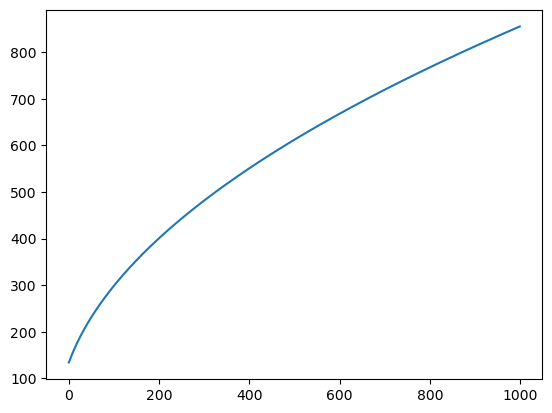

In [73]:
taxis = np.arange(0,1000,1)
plt.plot(nrq_time(taxis))

In [74]:
bg_10 = bg_total[-1]*(5*365)*50*7 + N_bg_time[-1]
bg_10

716331.835

In [75]:
annual_df = pd.read_csv("annual_changes_mass.csv", index_col=0)
annual_df #g=1.23e-10
mean_123_1 = np.mean(annual_df["1"]/(2*np.pi))
mean_123_5 = np.mean(annual_df["5"]/(2*np.pi))
mean_123_X = np.mean(annual_df["10"]/(2*np.pi))

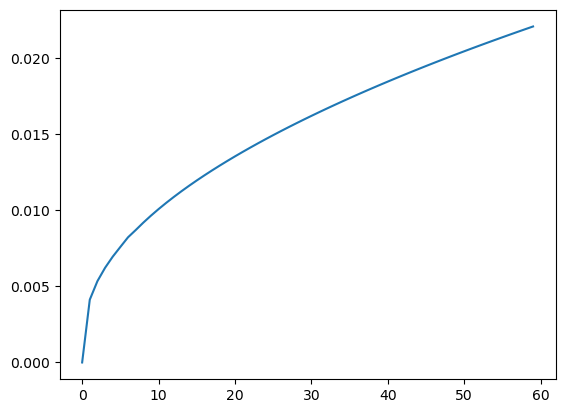

In [76]:
plt.plot(n_req/cpd_to_count)

In [77]:
days

array([   0.,   30.,   60.,   90.,  120.,  150.,  183.,  210.,  240.,
        270.,  300.,  330.,  360.,  390.,  420.,  450.,  480.,  510.,
        540.,  570.,  600.,  630.,  660.,  690.,  720.,  750.,  780.,
        810.,  840.,  870.,  900.,  930.,  960.,  990., 1020., 1050.,
       1080., 1110., 1140., 1170., 1200., 1230., 1260., 1290., 1320.,
       1350., 1380., 1410., 1440., 1470., 1500., 1530., 1560., 1590.,
       1620., 1650., 1680., 1710., 1740., 1770., 1800.])

In [78]:
np.argwhere(days == 1080)

array([[36]], dtype=int64)

In [79]:
n_req

array([   0.        ,  226.19992189,  292.96987393,  341.0303111 ,
        381.06287012,  416.18024495,  450.82261697,  476.79592498,
        503.65605486,  528.78045595,  552.47764188,  574.95853415,
        596.39387665,  616.92474172,  636.65417964,  655.67415714,
        674.05941171,  691.87627471,  709.17595762,  726.00360892,
        742.39932309,  758.39633276,  774.02319332,  789.30565021,
        804.26702674,  818.92733714,  833.30484595,  847.41628246,
        861.2758737 ,  874.89671927,  888.29202927,  901.47295514,
        914.44876737,  927.22914413,  939.82205847,  952.2359867 ,
        964.47886582,  976.55611603,  988.47480917, 1000.24160234,
       1011.86179482, 1023.34038065, 1034.6820727 , 1045.89227034,
       1056.97515742, 1067.93469759, 1078.77556725, 1089.50040079,
       1100.11259189, 1110.61626028, 1121.01445647, 1131.31008875,
       1141.50593229, 1151.60463756, 1161.60958971, 1171.52319073,
       1181.34690298, 1191.08378118, 1200.73593777, 1210.30539

In [80]:
g_3_1 = (nrq_time(3*365-183)/(mean_123_1))**(1/4)*1.23e-10
g_3_5 = (nrq_time(3*365-183)/(mean_123_5))**(1/4)*1.23e-10
g_3_X = (nrq_time(3*365-183)/(mean_123_X))**(1/4)*1.23e-10

g_5_1 = (nrq_time(5*365-183)/(mean_123_1*5/3))**(1/4)*1.23e-10
g_5_5 = (nrq_time(5*365-183)/(mean_123_5*5/3))**(1/4)*1.23e-10
g_5_X = (nrq_time(5*365-183)/(mean_123_X*5/3))**(1/4)*1.23e-10

      
g_X_1 = (nrq_time(10*365-183)/(mean_123_1*10/3))**(1/4)*1.23e-10
g_X_5 = (nrq_time(10*365-183)/(mean_123_5*10/3))**(1/4)*1.23e-10
g_X_X = (nrq_time(10*365-183)/(mean_123_X*10/3))**(1/4)*1.23e-10


In [81]:
print(g_3_1)
print(g_3_5)
print(g_3_X)
print(g_5_1)
print(g_5_5)
print(g_5_X)
print(g_X_1)
print(g_X_5)
print(g_X_X)

4.997561342622905e-10
5.838920449876002e-10
1.1784412733914467e-09
4.72678337009983e-10
5.522555940718993e-10
1.114590943826713e-09
4.3596070263798116e-10
5.093564015442831e-10
1.0280095637519384e-09


In [58]:
mean_123_X

0.09710172189703904